# Decision trees (cont.)

## Decision tree training algorithm (cont.)

It is essential to find out which attribute should be used at the root of the tree. If that can be known, then everything is straightforward.

### Finding the best attribute to the root of the tree (cont.)

#### Example: PlayTennis samples (cont.)

| Day | Outlook | Temperature | Humidity | Wind | PlayTennis |
| --  | --      | --          | --       | --   |   --       |
| D1 | Sunny | Hot | High | Weak | No |
| D2 | Sunny | Hot | High | Strong | No |
| D3 | Overcast | Hot | High | Weak | Yes |
| D4 | Rain | Mild | High | Weak | Yes |
| D5 | Rain | Cool | Normal | Weak | Yes |
| D6 | Rain | Cool | Normal | Strong | No |
| D7 | Overcast | Cool | Normal | Strong | Yes |
| D8 | Sunny | Mild | High | Weak | No |
| D9 | Sunny | Cool | Normal | Weak | Yes |
| D10 | Rain | Mild | Normal | Weak | Yes |
| D11 | Sunny | Mild | Normal | Strong | Yes |
| D12 | Overcast | Mild | High | Strong | Yes |
| D13 | Overcast | Hot | Normal | Weak | Yes |
| D14 | Rain | Mild | High | Strong | No |

Decision tree for the PlayTennis data

<div>
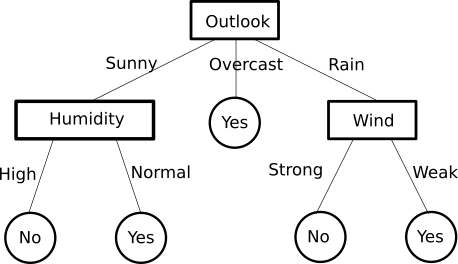
</div>

Approach the best attribute selection via the question which kind of attribute would be ideal (best possible) and which worst possible?

### Entropy

Entropy measures the lack of order.

In [ ]:
def my_entropy(p_pos_):
    entr = -p_pos_*np.log2(p_pos_)-(1-p_pos_)*np.log2(1-p_pos_)
    return entr

#### Example: Entropy

What kind of values the entropy formula obtains. Note that we don't test $(0,1)$ but only $[0,1]$ -why?

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Values p_pos = 0.0 and p_pos = 1.0 are problematic
p_pos = np.arange(0.001,0.999,0.001)

#plt.plot(p_pos,-p_pos*np.log2(p_pos+0.0000001)-(1-p_pos)*np.log2(1-p_pos+0.0000001))
plt.plot(p_pos,my_entropy(p_pos))
plt.grid()
plt.xlabel('p_pos')
plt.ylabel('Entropy')
plt.xticks(np.arange(0, 1, step=0.1))
plt.show()

Does $xlog_2x$ indeed approach to zero when $x \rightarrow 0$?

In [ ]:
# What happens at p_pos -> 0

x = np.array([0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001])


plt.plot(range(len(x)),-x*np.log2(x))
for x_ind in range(len(x)):
    plt.text(x_ind,-x[x_ind]*np.log2(x[x_ind]),x[x_ind])

#### Example: Original entropy for the PlayTennis samples

In [ ]:
print(f'Entropy of the 14 PlayTennis samples: {my_entropy(9/14)}')

### Gain function

Gain(S,A) computes the gain in order (reduction in entropy) for the samples in S if the attribute A is selected.

#### Example: Gains for PlayTennis attributes

Let's compute $Gain(S,Overlook)$, $Gain(S,Temperature)$, $Gain(S,Humidity)$ and $Gain(S,Wind)$ to select the best attribute to the root. 

In [ ]:
G_overlook = my_entropy(9/14)-(5/14*my_entropy(2/5)+4/14*my_entropy(4/4-0.000001)+5/14*my_entropy(3/5))
G_temp = my_entropy(9/14)-(4/14*my_entropy(2/4)+6/14*my_entropy(4/6)+4/14*my_entropy(3/4))
G_humidity = my_entropy(9/14)-(7/14*my_entropy(3/7)+7/14*my_entropy(6/7))
G_wind = my_entropy(9/14)-(8/14*my_entropy(6/8)+6/14*my_entropy(3/6))

print(f'Gain(S,Overlook) = {G_overlook:.4f}')
print(f'Gain(S,Temperature) = {G_temp:.4f}')
print(f'Gain(S,Humidity) = {G_humidity:.4f}')
print(f'Gain(S,Wind) = {G_wind:.4f}')

### ID3 Algorithm

```
ID3 (Examples, Target_Attribute, Attributes)

Create a root node for the tree
IF all examples are positive
    Return the single-node tree Root, with label = +.
IF all examples are negative
    Return the single-node tree Root, with label = -.
IF number of predicting attributes is empty
    Return the single node tree Root, with label = most common value of the target attribute in the examples.

Otherwise BEGIN
    A = The Attribute that best classifies examples.
    Decision Tree attribute for Root = A.
    FOR each possible value, v_i, of A
        Add a new tree branch below Root, corresponding to the test A = v_i.
        Let Examples(v_i) be the subset of examples that have the value v_i for A
        IF Examples(v_i) is empty
            Then below this new branch add a leaf node with label = most common target value in the examples
        ELSE
            below this new branch add the subtree ID3(Examples(v_i), Target_Attribute, Attributes – {A})
    Return Root
```

Decision tree pros and cons.

### Scikit-Learn Decision Tree

Scikit-Learn has decision trees for regression (sklearn.tree.DecisionTreeRegressor()) and classification (sklearn.tree.DecisionTreeClassifier()).

Scikit-Learn decision tree learning algorithm is CART that supports both classification and regression targets. ID3 (Iterative Dichotomiser 3) was developed in 1986 by Ross Quinlan. Later, Quinlan extended the algorithm also to support numerical attributes (not only categories) in his C4.5 algorithm. CART is an extension of C4.5 and thus essentially similar to ID3 we used.

#### Example: PlayTennis with Sklearn Decision Tree

Let's first load the necessary packages

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.tree import export_text
#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import mean_absolute_error

First we load the PlayTennis data using our dirty loading code.

In [ ]:
file = "data/PlayTennis.dat"

X = []
y = []

with open(file, "r", encoding='ISO-8859-1') as f:
    for line in f:
        
        # Skip first line
        if line.startswith("Day"):
            print(line)
            parts = line.strip().split(",")
            feat_names = parts[1:5]
            continue
        
        parts = line.strip().split(",")
        
        outlook = parts[1]
        temperature = parts[2]
        humidity = parts[3]
        wind = parts[4]
        playtennis = parts[5]
        
        X.append([outlook, temperature, humidity, wind])
        y.append(playtennis)
        
X = np.array(X)
y = np.array(y)
print(X)
print(y)

Then we convert the label values to enumerated numeric values, for example, Outlook=Overcast => 0, Outlook=Rain => 1, Outlook=Sunny => 2. Scikit does that automatically for us.

In [ ]:
encoded_cols = [0, 1, 2, 3]

X_b = np.zeros(X.shape)

for col in encoded_cols:
    lb = LabelEncoder()
    z = lb.fit_transform(X[:, col])
    X_b[:,col] = z
    le_name_mapping = dict(zip(X[:, col], lb.transform(X[:, col])))
    print(feat_names[col])
    print(le_name_mapping)

y_b = lb.fit_transform(y[:])

X_b = X_b.astype(float)
y = y_b.astype(float)
print(X_b)
print(y)

Then we can train a decision tree classifier and test it with out training data. We can even plot the tree.

In [ ]:
print(feat_names)
# Make a classifier
clf = tree.DecisionTreeClassifier(criterion="entropy",splitter="best")

# Train the classifier using fit function
clf = clf.fit(X_b, y)

# Let's test with training data
print(clf.predict(X_b))

# Print the tree
r = export_text(clf, feature_names=feat_names)
print(r)

# Plot the tree
tree.plot_tree(clf)

# Random Forests

Random forest is an ensemble learning technique using decision trees.

<div>
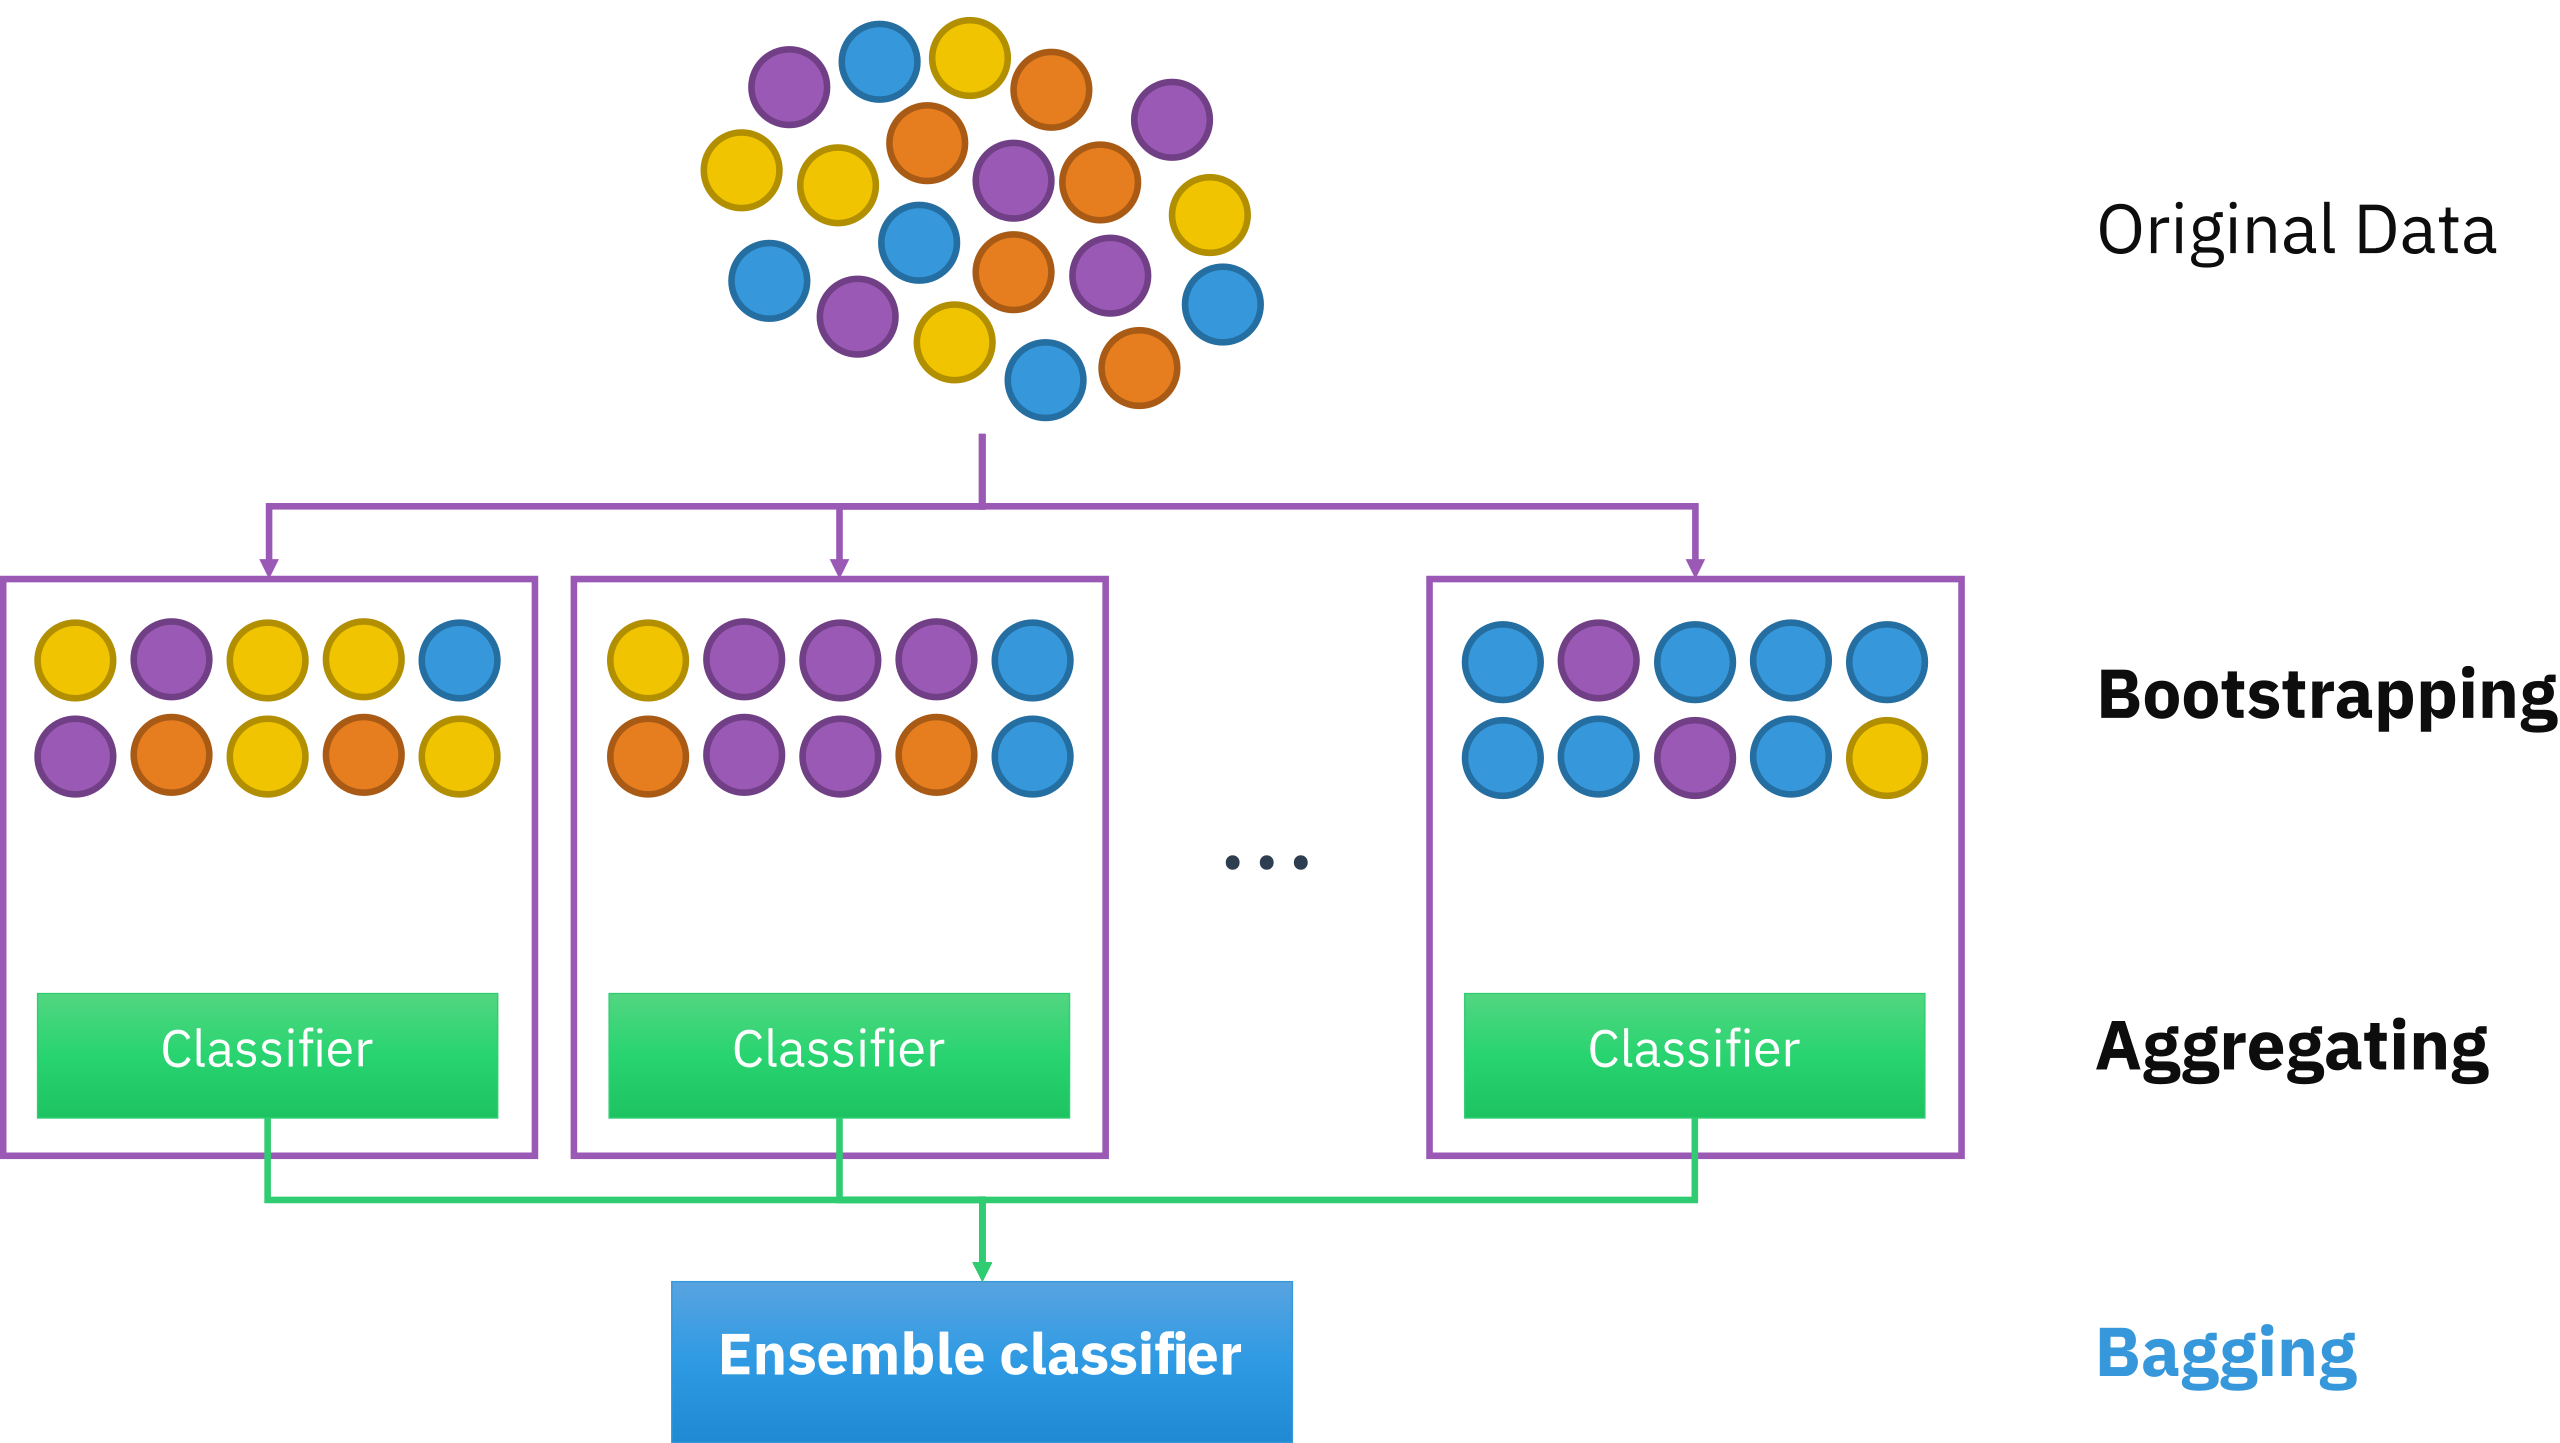
</div>

## Algorithm for classification and regression

```
FOR b = 1 to B:
    Draw a bootstrap sample Z∗ of size N from the training data.
    Grow a random-forest tree T_b to the bootstrapped data, by recursively repeating the following steps for each terminal node of the tree, until the minimum node size n_min is reached.
        Select m variables at random from the p variables.
        Pick the best variable among the m.
        Pick the best variable/split-point among the m.
        Split the node into daughter nodes.
    
    Output the ensemble of trees {T_b}_1^B .
```

**Usage of the forest of trees:**

Regression: $\hat{f}_{rf}^B (x) =\frac{1}{B} \sum_{b=1}^BT_b(x)$ .

Classification: Let $\hat{C}_ b (x)$ be the class prediction of the $b$th random-forest tree. Then $\hat{C}^B_{rf}(x) = \hbox{majority vote} \left\{\hat{C}_b(x)\right\}_1^B$ .



## Scikit-Learn

These methods are very powerful and should be considered whenever you have suitable data.

 * [sklearn.ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
 * [sklearn.ensemble.RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)



## References

 * T. Mitchell (1997): Machine Learning, Chapter 3.
 * T. Hastie, R. Tibshirani and J. Friedman (2001): The Elements of Statistical Learning, 2nd edition, Chapter 15.